In [1]:
import numpy as np
import fitsio
import healpy as hp
import healsparse as hsp
import skyproj
import matplotlib.pyplot as plt

In [2]:
file = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/training/'

In [3]:
validPix = fitsio.read(file + 'Valid_512_Pixels.fits')['PIXEL']

In [4]:
corrMap = fitsio.read(file + 'Inter_Blue_24-25_Corrections_Map.fits')['SIGNAL']

In [5]:
correctionMap = np.full(12*(512**2), hp.UNSEEN)
correctionMap[validPix] = corrMap
corrHSP = hsp.HealSparseMap(nside_coverage=32, healpix_map=correctionMap)

In [6]:
np.max(corrMap)

6.09858902691364

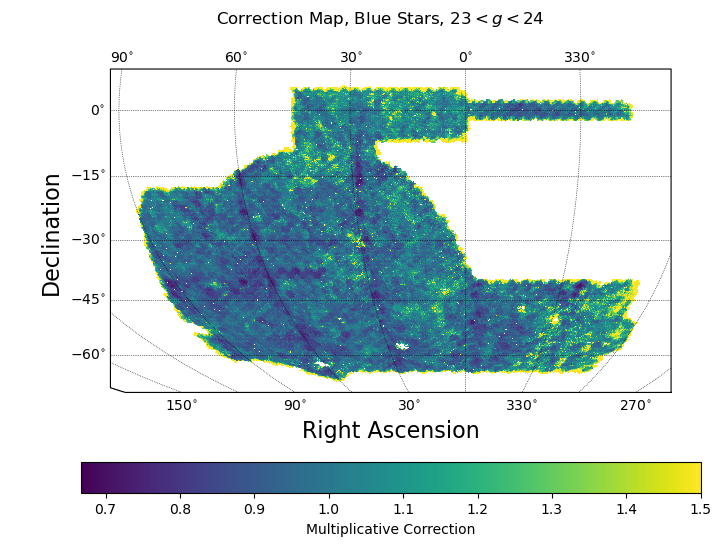

In [14]:
# The default DES projection is a McBrydeSkymap.
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_hspmap(corrHSP, cmap = 'viridis')
plt.clim(2/3, 3/2)
plt.colorbar(location = 'bottom', label = 'Multiplicative Correction')
fig.suptitle(r'Correction Map, Blue Stars, $23<g<24$')
plt.show()

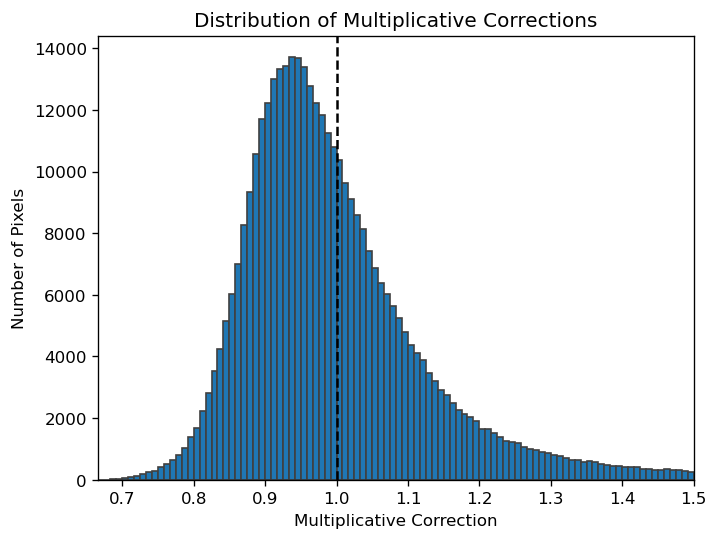

In [23]:
plt.figure(dpi=120)
plt.hist(corrMap, bins = np.linspace(2/3, 3/2, 101), edgecolor = '0.25', linewidth = 1)
plt.axvline(x = 1, color = 'black', linestyle = '--')
plt.xlim([2/3, 3/2])
plt.xlabel('Multiplicative Correction')
plt.ylabel('Number of Pixels')
plt.title('Distribution of Multiplicative Corrections')
plt.show()

In [8]:
# res = 512

In [9]:
# validPix = fitsio.read("/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/Kyle_Stuff/training/Valid_"+str(res)+"_Pixels.fits")['PIXEL']
# pixCheck = np.full(12*(res**2), False, dtype = bool)
# pixCheck[validPix] = True

In [10]:
# # This is the actual file containing all of the data
# balrFile = '/afs/hep.wisc.edu/bechtol-group/MegansThings/balrog_detection_catalog_sof_run2_stars_v1.4_avg_added_match_flags.fits'
# # This reads in all of the data. Most of these are just flags, the only pieces that get used much outside
# # of filtering are detected, true_ra and true_dec which get used to convert into healPixels.
# balrData = fitsio.read(balrFile, columns = ['detected', 'true_ra', 'true_dec',
#                                             'flags_foreground', 'flags_badregions', 'flags_footprint',
#                                             'match_flag_1.5_asec', 'true_g_Corr', 'true_gr_Corr'])

# # These are in degrees which is why lonlat is set to True in the next cell.
# balrRA = balrData['true_ra']
# balrDEC = balrData['true_dec']
# # This is used for detection rates, each point is either a 0 (no detection) or a 1 (detection)
# balrDETRepeats = balrData['detected']
# # Everything from here on out is simply used in order to filter the data
# FOREGROUND = balrData['flags_foreground']
# BADREGIONS = balrData['flags_badregions']
# FOOTPRINT = balrData['flags_footprint']
# ARCSECONDS = balrData['match_flag_1.5_asec']
# GMAG = balrData['true_g_Corr']
# RMAG = balrData['true_g_Corr'] - balrData['true_gr_Corr']

# # This is used to filter out any injections that either weren't detected or had flags raised.
# cutIndices = np.where((FOREGROUND == 0) & 
#                       (BADREGIONS < 2) & 
#                       (FOOTPRINT == 1) & 
#                       (ARCSECONDS < 2) & 
#                       (GMAG - RMAG >= -0.3) & 
#                       (GMAG - RMAG <= 1) &
#                       (GMAG > 26))[0]# &
#                       #(GMAG <= 26))[0]

# # This reduced the data down to the actually valid pixels.
# balrDETRepeats = balrDETRepeats[cutIndices]
# balrRA = balrRA[cutIndices]
# balrDEC = balrDEC[cutIndices]

# # This converts the RA and DEC values from above to healpixels so we can compare to the sky condition.
# balrPIXRepeats = hp.ang2pix(res, balrRA, balrDEC, lonlat = True, nest = True)

# # This sorts by the pixel in order to make following methods more efficient.
# sortInds = balrPIXRepeats.argsort()
# balrPIXRepeats = balrPIXRepeats[sortInds[::1]]
# balrDETRepeats = balrDETRepeats[sortInds[::1]]

# # These are indices that will be looping through the pixStar and starPix arrays in parallel.
# uniqInd = 0
# balrInd = 0

# # This will be used to store the number of stars at each pixel.
# balrPIX = np.unique(balrPIXRepeats) # The unique pixels, with no repeats.
# balrDET = np.zeros_like(balrPIX)
# balrINJ = np.zeros_like(balrPIX)

# while balrInd < len(balrPIXRepeats):
#     if balrPIX[uniqInd] == balrPIXRepeats[balrInd]: # If the pixels match up in the arrays.
#         balrDET[uniqInd] += balrDETRepeats[balrInd] # Add one if there was a detection at this location.
#         balrINJ[uniqInd] += 1                # Add one to the corresponding spot in the balStar array.
#         balrInd += 1                         # Add one to the starInd to see if the next index in starPix is also the same.
#         # Since the last index of pixStar and starPix are the same, starInd will increase the last time through the loop,
#         # making this the index that we must restrict in the while loop.
#     else:
#         uniqInd += 1 # If the pixels are no longer the same, increase the index you check in the pixStar array.
        
# balrDET = balrDET[pixCheck[balrPIX]]
# balrINJ = balrINJ[pixCheck[balrPIX]]
# balrPIX = balrPIX[pixCheck[balrPIX]]

In [11]:
# np.sum(balrDET)

In [12]:
# np.sum(balrINJ)/np.sum(balrDET)